<a href="https://colab.research.google.com/github/MelodyK45/Fraud-detection/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
import os
os.listdir()

['.config', 'creditcard.csv.xlsx', 'sample_data']

In [3]:
import pandas as pd
df = pd.read_excel("creditcard.csv.xlsx",engine="openpyxl")

print("shape:",df.shape)
df.head()

shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
class_counts = df['Class'].value_counts()

print(class_counts)

fraud_percentage = (class_counts[1] / len(df)) * 100
print(f"\nfraud percentage: {fraud_percentage:.4f}%")

Class
0    284315
1       492
Name: count, dtype: int64

fraud percentage: 0.1727%


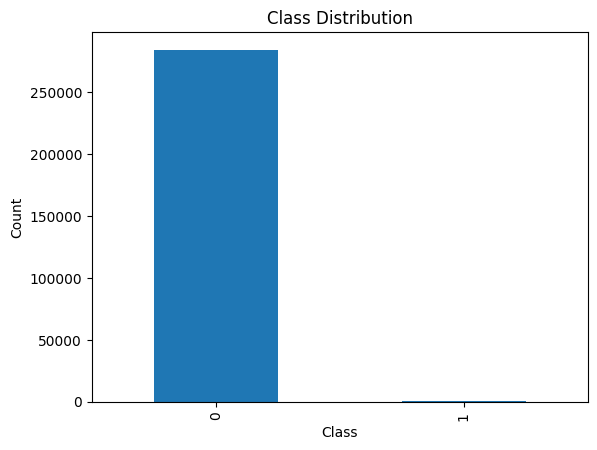

In [5]:
plt.figure()
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

The dataset is highly imbalanced, with fraudulent transactions representing less than 1% of total transactions. This imbalance requires special handling during model training

In [6]:
print(df.isnull().sum().max())

0


In [7]:
x = df.drop("Class", axis=1)
y = df["Class"]

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x["Amount"] = scaler.fit_transform(x[["Amount"]])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("train shape:", x_train.shape)
print("test shape:", x_test.shape)

train shape: (227845, 30)
test shape: (56962, 30)


LOGISTIC REGRESSION

In [10]:
from sklearn.linear_model import LogisticRegression

# Use class_weight='balanced' to handle imbalance

model = LogisticRegression(class_weight='balanced',max_iter=1000)

model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [11]:
y_pred = model.predict(x_test)
y_prod = model.predict_proba(x_test)[:, 1]

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nclassification report:")
print(classification_report(y_test, y_pred))

print("\nroc-auc score:")
print(roc_auc_score(y_test,y_prod))

confusion matrix:
[[55318  1546]
 [    8    90]]

classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


roc-auc score:
0.9715035264950099


In [13]:
log_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

log_model.fit(x_train, y_train)

y_pred_log = log_model.predict(x_test)
y_prod_log = log_model.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred_log))
print("roc-auc:", roc_auc_score(y_test, y_prod_log))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

roc-auc: 0.9715035264950099


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ISOLATION FOREST

In [14]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=100,
    contamination=0.0017, # approx fraud rate
    random_state=42)

iso.fit(x_train)

y_pred_iso = iso.predict(x_test)

#Convert: -1 = anomaly > 1 (fraud), 1 = normal > 0
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_iso))

print("\nclassification report:")
print(classification_report(y_test, y_pred_iso))

confusion matrix:
[[56791    73]
 [   65    33]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.34      0.32        98

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.66     56962
weighted avg       1.00      1.00      1.00     56962



DECISION TREE

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100,
                                  class_weight='balanced',
                                  random_state=42)

rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
y_prod_rf = rf_model.predict_proba(x_test)[:, 1]

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nclassification report:")
print(classification_report(y_test, y_pred_rf))

print("\nroc-auc score:")
print(roc_auc_score(y_test,y_prod_rf))

confusion matrix:
[[56861     3]
 [   23    75]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


roc-auc score:
0.9682966268246185


RANDOM FOREST

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

dt_model = DecisionTreeClassifier(class_weight='balanced',random_state=42)

dt_model.fit(x_train, y_train)

y_pred_dt = dt_model.predict(x_test)
y_prod_dt = dt_model.predict_proba(x_test)[:, 1]

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nclassification report:")
print(classification_report(y_test, y_pred_dt))

print("\nroc-auc score:")
print(roc_auc_score(y_test,y_prod_dt))


confusion matrix:
[[56830    34]
 [   27    71]]

classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.72      0.70        98

    accuracy                           1.00     56962
   macro avg       0.84      0.86      0.85     56962
weighted avg       1.00      1.00      1.00     56962


roc-auc score:
0.8619459390396564


NEURAL NETWORK

In [17]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=20,
    random_state=42)

nn_model.fit(x_train, y_train)

y_pred_nn = nn_model.predict(x_test)
y_prod_nn = nn_model.predict_proba(x_test)[:, 1]

print("confusion matrix:")
print(confusion_matrix(y_test, y_pred))

print("n\nclassification report:")
print(classification_report(y_test, y_pred_nn))

print("\nroc-auc score:")
print(roc_auc_score(y_test,y_prod_nn))

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


confusion matrix:
[[55318  1546]
 [    8    90]]
n
classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962


roc-auc score:
0.8348532804371045


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


FEATURE ENGINEERING

In [18]:
import numpy as np

df["amount_log"] = np.log1p(df["Amount"])

In [19]:
df["Hour"] = (df['Time'] // 3600) % 24

In [20]:
avg_amount = df["Amount"].mean()
df["Amount_above_avg"] = (df["Amount"] - avg_amount)

In [21]:
x = df.drop("Class" , axis=1)
y = df["Class"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x[["Amount", "amount_log", "Amount_above_avg"]] = scaler.fit_transform(x[["Amount", "amount_log", "Amount_above_avg"]])

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [23]:
log_model.fit(x_train, y_train)

y_pred_log = log_model.predict(x_test)
y_prod_log = log_model.predict_proba(x_test)[:, 1]

print(classification_report(y_test, y_pred_log))
print("roc-auc:", roc_auc_score(y_test, y_prod))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962

roc-auc: 0.9715035264950099


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
import numpy as np

#Simulate 5 new incoming transactions
new_transactions = x_test.sample(5)

#Predict fraud probability
fraud_prod = rf_model.predict_proba(new_transactions)[:,1]

#Set fraud threshold
threshold = 0.5

for i, prob in enumerate(fraud_prod):
  print(f"transaction {i+1} fraud probability: {prob:.2f}")

  if prob > threshold:
    print("alert: potential fraud detection!")
  else:
    print("transaction approved")

  print("-"*40)

transaction 1 fraud probability: 0.00
transaction approved
----------------------------------------
transaction 2 fraud probability: 0.00
transaction approved
----------------------------------------
transaction 3 fraud probability: 0.00
transaction approved
----------------------------------------
transaction 4 fraud probability: 0.00
transaction approved
----------------------------------------
transaction 5 fraud probability: 0.00
transaction approved
----------------------------------------


In [32]:
fraud_predictions = rf_model.predict(x_test)

fraud_rate = sum(fraud_predictions) / len(fraud_predictions)

print(f"Fraud Detection Rate: {fraud_rate:.4f}")

Fraud Detection Rate: 0.0014


A simulated monitoring system was implemented to track fraud detection rates in real time and trigger alerts based on probability thresholds.

In [29]:
import time

#Simulate large batch
large_batch  = x_test.sample(100000,replace = True)
start_time = time.time()

predictions = rf_model.predict(large_batch)

end_time = time.time()

print("time taken:", end_time - start_time, "seconds")
print("transactions processed:", len(large_batch))

time taken: 0.835702657699585 seconds
transactions processed: 100000


In [33]:
processikng_time = end_time - start_time
tps = len(large_batch)/ processing_time
print("transactions per second:",round(tps,2))

transactions per second: 119659.78


In [36]:
for i in range(1000):
  transaction = x_test.sample(1)
  prob = rf_model.predict_proba(transaction)[:,1]

  if prob > 0.3:
    pass #alert logic